In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

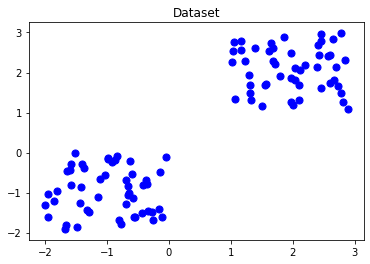

In [2]:
X = -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.title('Dataset')
plt.scatter(X[ : , 0], X[ :, 1], s = 50 , c = 'b')
plt.show()

In [3]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    

In [4]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 2.1974436053032713
2 : 0.7436261167521145
3 : 0.6586763070885984
4 : 0.5650291906686258
5 : 0.4908565544036849
6 : 0.43044414155460203
7 : 0.38793921042349233
8 : 0.34942931386745657
9 : 0.3242113676079558


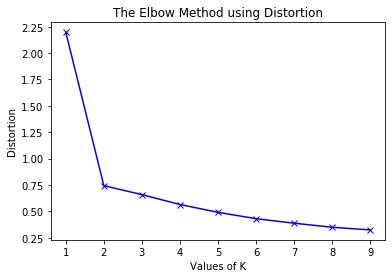

In [5]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [6]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 512.9626930875231
2 : 62.93467058961015
3 : 50.152297301253114
4 : 37.91848589196445
5 : 29.018913287689962
6 : 22.103758516350425
7 : 17.805143736340447
8 : 14.284366124316524
9 : 12.28942133182549


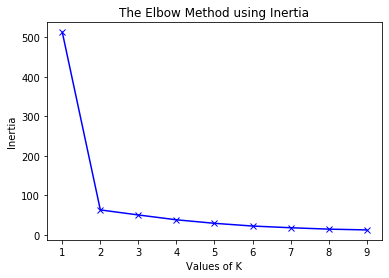

In [7]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [8]:
print(f"We can see that the distortion/inertia start decreasing in a linear fashion at 2")

We can see that the distortion/inertia start decreasing in a linear fashion at 2


In [9]:
Z = 2
Kmean = KMeans(n_clusters=Z).fit(X)
# Are we able to automate the Z number according to previous assumption ?

[[ 1.4321558   2.16567611]
 [-0.98211707 -0.96139116]
 [ 2.4348547   2.01149601]]


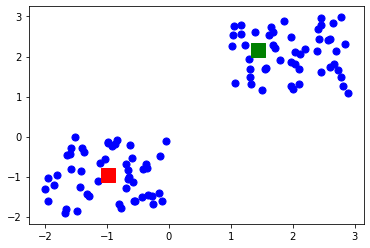

In [10]:

centroids = Kmean.cluster_centers_
print(centroids)
plt.scatter(X[ : , 0], X[ : , 1], s=50, c='b')
plt.scatter(centroids[0][0], centroids[0][1], s=200, c='g', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s=200, c='r', marker='s')
plt.show()

In [11]:
print(Kmean.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 2 0 2 2 2 2 2 0 2 0 2 2 0 2 0 0 2 0 0
 0 2 0 0 0 0 2 2 0 2 2 0 0 0 2 0 2 2 0 2 2 0 2 2 2 0]


In [12]:
sample_test=np.array([-3.0, -3.0])
second_test=sample_test.reshape(1, -1)
predicted=Kmean.predict(second_test)
print(predicted)

[1]
